# Classification Algorithm for Predictive Maintenance of College Facilities

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

In [ ]:
# Import and read the dataset

data = pd.read_csv('predictive_maintenance.csv')

# Make a backup copy of the data
dataBU = data
data

,UDI,Facility ID,Type,College building,College bus,Medical equipment,Network infrastructure,Official car,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
#Visualize the data of the DataFrame - .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UDI                     10000 non-null  int64  
 1   Facility ID             10000 non-null  object 
 2   Type                    10000 non-null  object 
 3   College building        10000 non-null  float64
 4   College bus             10000 non-null  float64
 5   Medical equipment       10000 non-null  int64  
 6   Network infrastructure  10000 non-null  float64
 7   Official car            10000 non-null  int64  
 8   Target                  10000 non-null  int64  
 9   Failure Type            10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
#Visualize the data of the DataFrame - .describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
College building,10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
College bus,10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Medical equipment,10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Network infrastructure,10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Official car,10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [ ]:
#Check if there are null data
data.isna().sum()

UDI                       0
Facility ID               0
Type                      0
College building          0
College bus               0
Medical equipment         0
Network infrastructure    0
Official car              0
Target                    0
Failure Type              0
dtype: int64

In [ ]:
# Check how many different values our categorical variables take

data.select_dtypes(include='object').nunique()

Facility ID     10000
Type                3
Failure Type        6
dtype: int64

In [ ]:
# Analyze the target variable
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

# Univariate analysis of categorical variables

Text(0.5, 1.0, 'Porcentajes de tipos de calidad de producto')

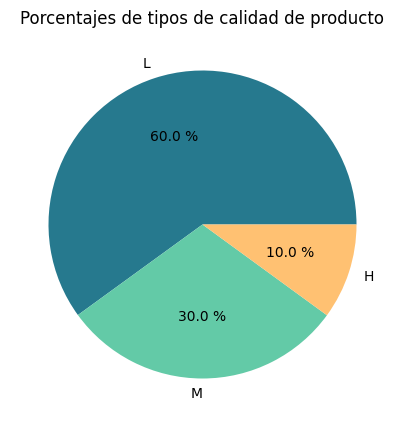

In [ ]:
# Variable Type: type or quality of the product. The values are the letters L (low), M (medium), and H (high)

df_graficar = data['Type'].value_counts().rename_axis('Type').reset_index(name='cant')

fig, ax = plt.subplots(figsize=(12,5))

ax.pie(df_graficar['cant'], labels = df_graficar['Type'], autopct="%0.1f %%", colors=("#26798E", "#63CAA7", "#FFC172"))

ax.set_title('Porcentajes de tipos de calidad de producto')

Text(0.5, 1.0, 'Tipos de fallas')

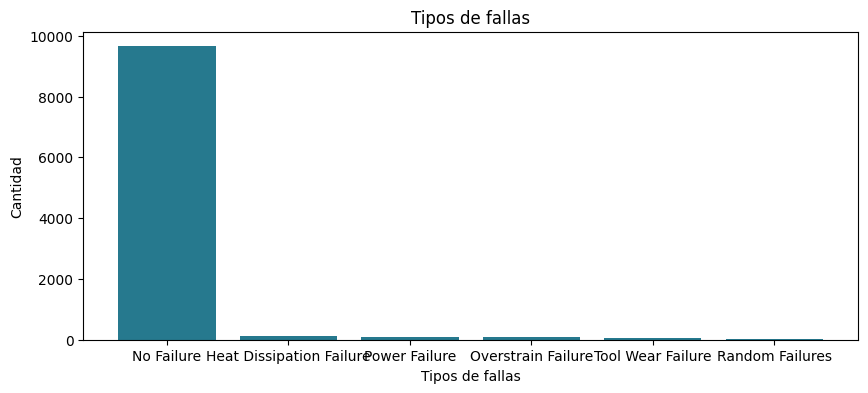

In [ ]:
#Variable Failure Type: type of failure

df_graficar = data['Failure Type'].value_counts().rename_axis('Failure Type').reset_index(name='cant')

fig, ax = plt.subplots(figsize=(10,4))

ax.bar(df_graficar['Failure Type'], df_graficar['cant'], color='#26798E')

ax.set_xlabel('Tipos de fallas')
ax.set_ylabel('Cantidad')
ax.set_title('Tipos de fallas')

# Bivariate Analysis

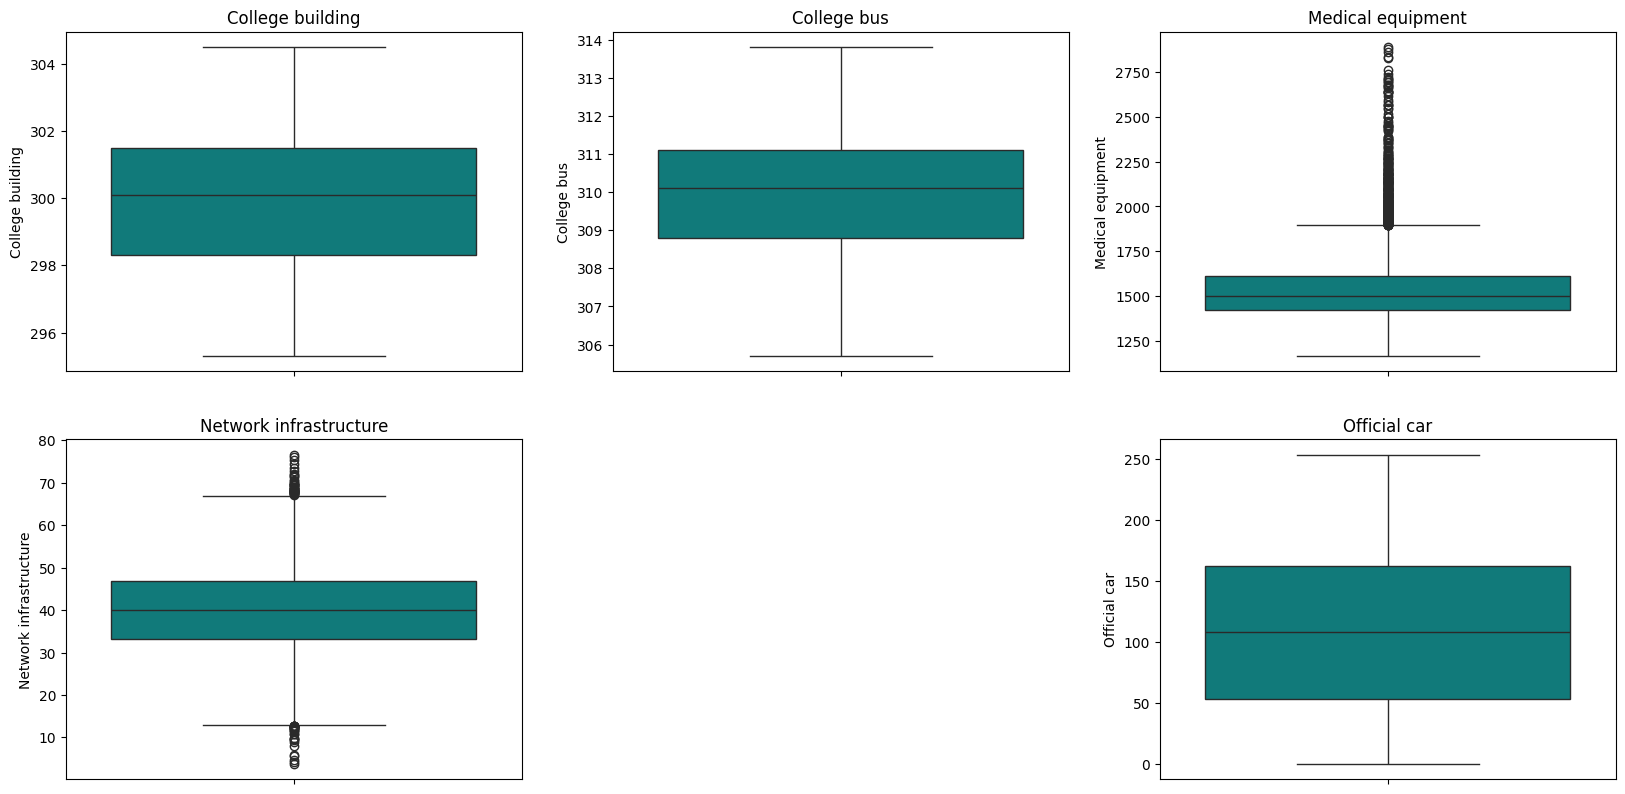

In [ ]:
#We use Boxplot to detect outliers

plt.figure(figsize=(20,15))

plt.subplot(331), sns.boxplot(y=data["College building"], color='#008B8B').set(title='College building')

plt.subplot(332), sns.boxplot(y=data["College bus"], color='#008B8B').set(title='College bus')

plt.subplot(333), sns.boxplot(y=data["Medical equipment"], color='#008B8B').set(title='Medical equipment')

plt.subplot(334), sns.boxplot(y=data["Network infrastructure"], color='#008B8B').set(title='Network infrastructure')

plt.subplot(336), sns.boxplot(y=data["Official car"], color='#008B8B').set(title='Official car')

plt.show()


Text(0, 0.5, 'Quality')

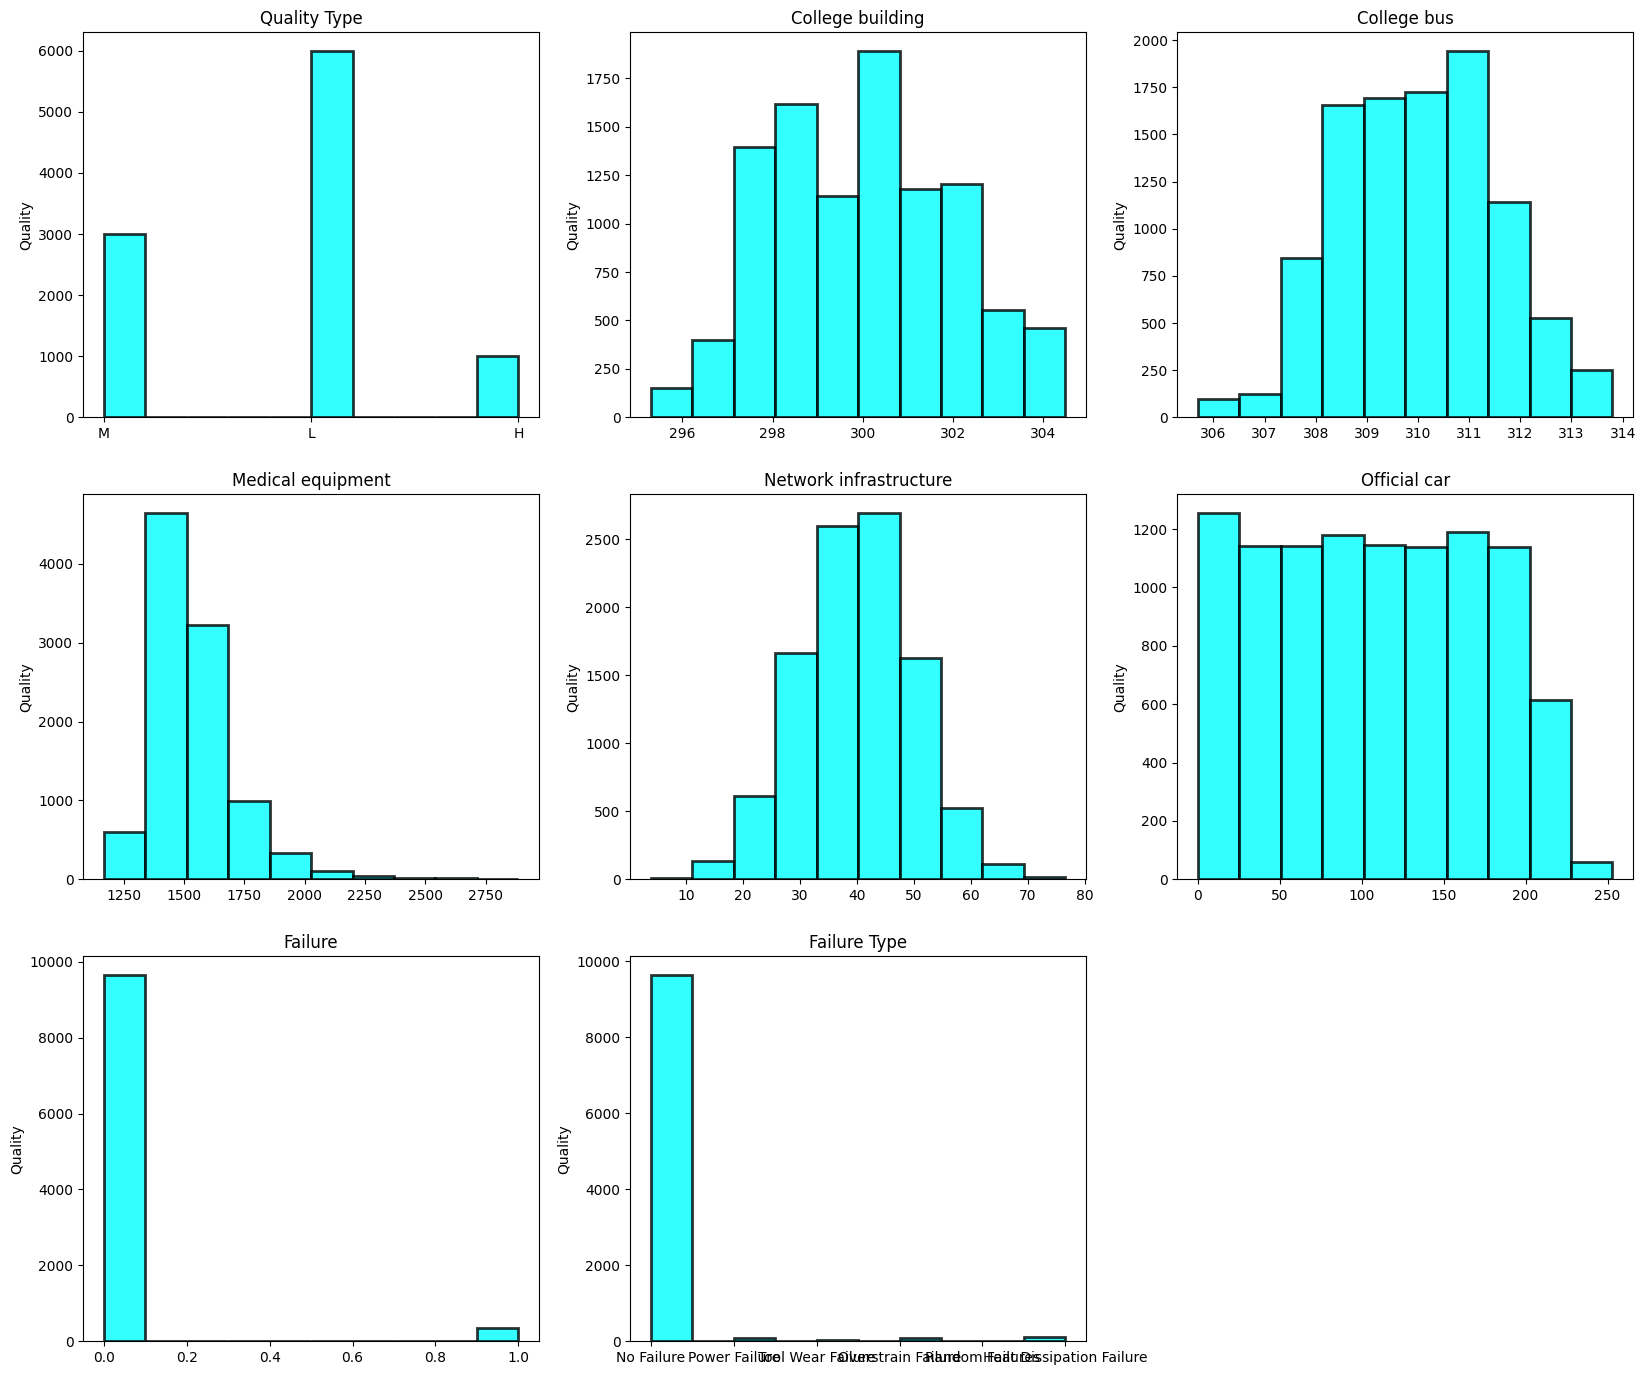

In [ ]:
plt.figure(figsize=(20,17))

plt.subplot(331)
plt.hist(data['Type'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('Quality Type')
plt.ylabel('Quality')

plt.subplot(332)
plt.hist(data['College building'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('College building')
plt.ylabel('Quality')

plt.subplot(333)
plt.hist(data['College bus'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('College bus')
plt.ylabel('Quality')

plt.subplot(334)
plt.hist(data['Medical equipment'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('Medical equipment')
plt.ylabel('Quality')

plt.subplot(335)
plt.hist(data['Network infrastructure'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('Network infrastructure')
plt.ylabel('Quality')

plt.subplot(336)
plt.hist(data['Official car'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('Official car')
plt.ylabel('Quality')

plt.subplot(337)
plt.hist(data['Target'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('Failure')
plt.ylabel('Quality')

plt.subplot(338)
plt.hist(data['Failure Type'], color='#00FFFF', edgecolor = 'black', alpha = 0.8, linewidth = 2)
plt.title('Failure Type')
plt.ylabel('Quality')


# Transform the `categorical` variables into numerical by adopting a binary criterion and grouping to achieve better model performance

In [ ]:
data= data.replace({'Type':
               {'L':0,
                'M':1,
               'H':2}
              })

data= data.replace({'Failure Type':
               {'No Failure':0,
                'Heat Dissipation Failure':1,
                'Power Failure':2,
                'Overstrain Failure':3,
                'Tool Wear Failure':4,
                'Random Failures':5}
              })


In [ ]:
#Delete the Product ID column
data.drop(columns=['Facility ID'],inplace=True)

In [ ]:
# Rename some columns
data = data.rename(columns={'College building':'College building',
                            'College bus':'College bus',
                            'Medical equipment': 'Medical equipment',
                            'Network infrastructure': 'Network infrastructure',
                            'Official car	': 'Official car	'})
data

,UDI,Type,College building,College bus,Medical equipment,Network infrastructure,Official car,Target,Failure Type
0,1,1,298.1,308.6,1551,42.8,0,0,0
1,2,0,298.2,308.7,1408,46.3,3,0,0
2,3,0,298.1,308.5,1498,49.4,5,0,0
3,4,0,298.2,308.6,1433,39.5,7,0,0
4,5,0,298.2,308.7,1408,40.0,9,0,0
...,...,...,...,...,...,...,...,...,...
9995,9996,1,298.8,308.4,1604,29.5,14,0,0
9996,9997,2,298.9,308.4,1632,31.8,17,0,0
9997,9998,1,299.0,308.6,1645,33.4,22,0,0
9998,9999,2,299.0,308.7,1408,48.5,25,0,0


<Axes: >

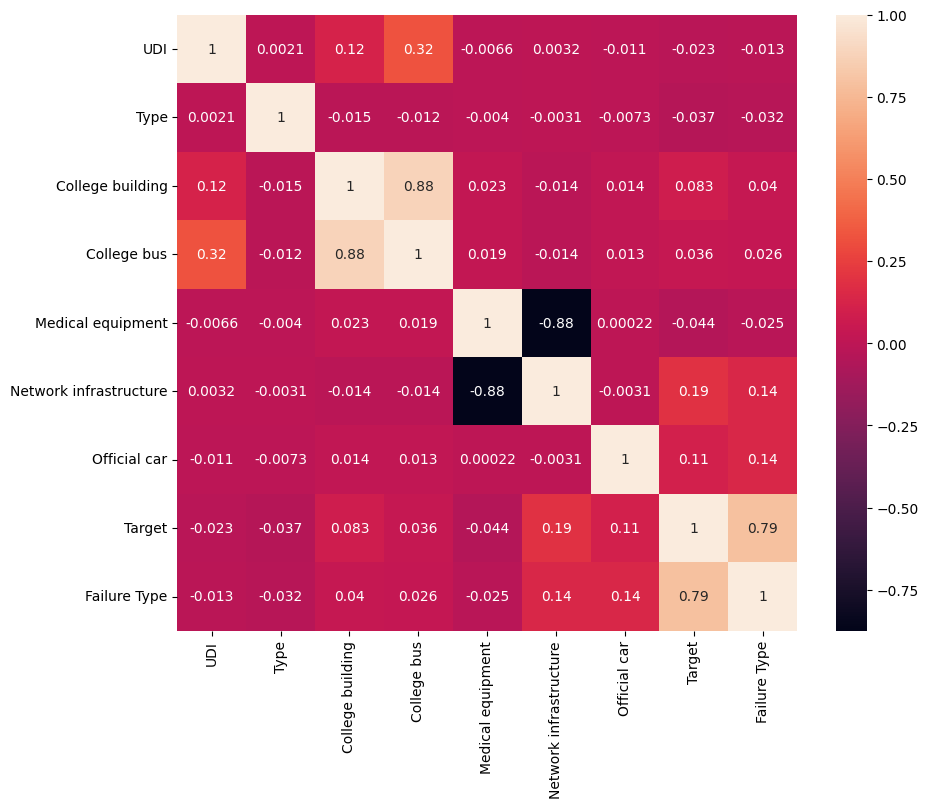

In [ ]:
# Plot the correlation between variables with a Heatmap

f, ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True)

# Classification algorithms

In [ ]:
#We separate the data into X, y

y=data['Target']
X=data.drop('Target', axis=1)

# We separate into train and test

X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size=0.3 ,train_size= 0.7 ,random_state= 42)

# KNN

In [ ]:
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)
predicknn = knn.predict(X_test)

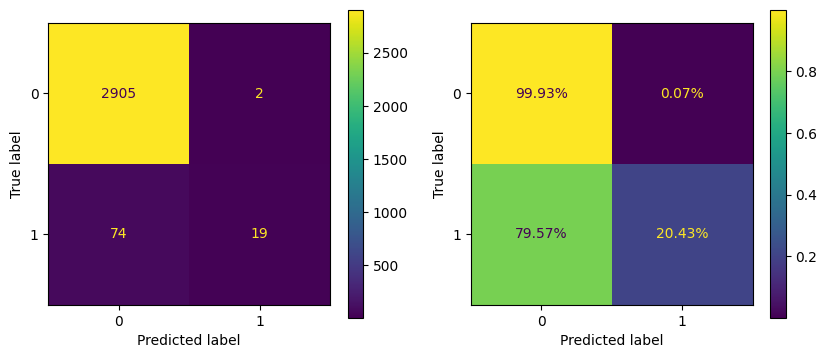

In [ ]:
#Confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, normalize='true', values_format='.2%', ax=ax[1])

In [ ]:
#Model metrics

knn_accuracy  = accuracy_score(y_test, predicknn)
knn_precision = precision_score(y_test, predicknn)
knn_recall    = recall_score(y_test, predicknn)
knn_score     = f1_score(y_test, predicknn)

print(f"Accuracy (predicciones correctas): {knn_accuracy}")
print(f"Precision (predicciones positivas correctas): {knn_precision}")
print(f"Recall (positivos detectados): {knn_recall}")
print(f"F1 Score (presision y recall): {knn_score}")


Accuracy (predicciones correctas): 0.9746666666666667
Precision (predicciones positivas correctas): 0.9047619047619048
Recall (positivos detectados): 0.20430107526881722
F1 Score (presision y recall): 0.33333333333333337


AUC for KNN: 0.7384640707820574


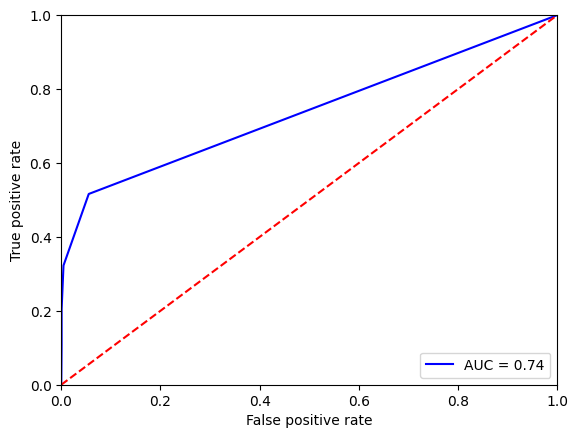

In [ ]:
#ROC-AUC metric
class_probabilities = knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for KNN: {roc_auc}")

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predicrf = rf.predict(X_test)

In [ ]:
X_test

,UDI,Type,College building,College bus,Medical equipment,Network infrastructure,Official car,Failure Type
6252,6253,0,300.8,310.3,1538,36.1,198,0
4684,4685,1,303.6,311.8,1421,44.8,101,0
1731,1732,1,298.3,307.9,1485,42.0,117,0
4742,4743,0,303.3,311.3,1592,33.7,14,0
4521,4522,0,302.4,310.4,1865,23.9,129,0
...,...,...,...,...,...,...,...,...
8014,8015,0,300.9,312.0,1500,44.2,188,0
1074,1075,0,297.0,307.9,1595,31.7,170,0
3063,3064,0,300.0,309.1,1431,45.4,90,0
6487,6488,2,300.6,309.8,1541,36.2,166,0


In [ ]:
predicrf

array([0, 0, 0, ..., 0, 0, 0])

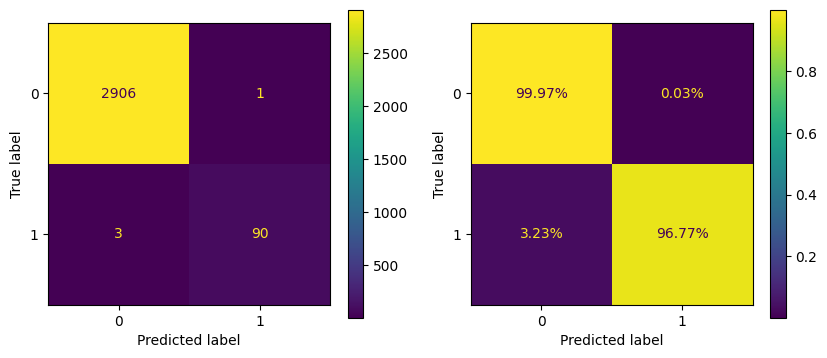

In [ ]:
#Confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize='true', values_format='.2%', ax=ax[1])

In [ ]:
#Model metrics

rf_accuracy  = accuracy_score(y_test, predicrf)
rf_precision = precision_score(y_test, predicrf)
rf_recall    = recall_score(y_test, predicrf)
rf_score     = f1_score(y_test, predicrf)

print(f"Accuracy (predicciones correctas): {rf_accuracy}")
print(f"Precision (predicciones positivas correctas): {rf_precision}")
print(f"Recall (positivos detectados): {rf_recall}")
print(f"F1 Score (presision y recall): {rf_score}")

Accuracy (predicciones correctas): 0.9986666666666667
Precision (predicciones positivas correctas): 0.989010989010989
Recall (positivos detectados): 0.967741935483871
F1 Score (presision y recall): 0.9782608695652174


AUC for random forest: 0.9872277150815052


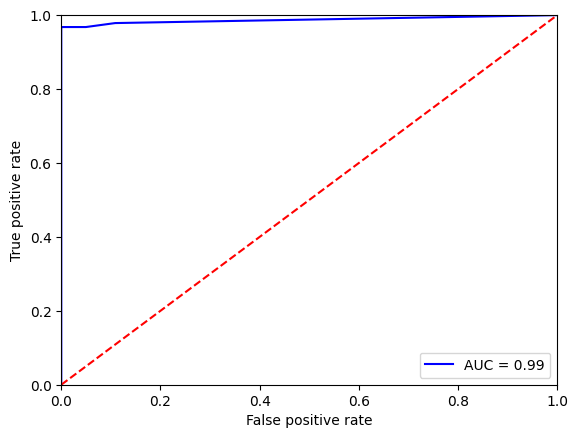

In [ ]:
#ROC-AUC metric
class_probabilities = rf.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for random forest: {roc_auc}")

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

predicdt = dt.predict(X_test)

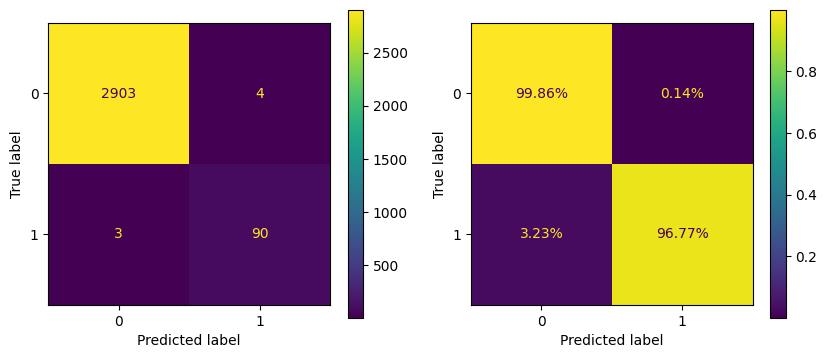

In [ ]:
#Confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, normalize='true', values_format='.2%', ax=ax[1])

In [ ]:
#Model metrics

dt_accuracy  = accuracy_score(y_test, predicdt)
dt_precision = precision_score(y_test, predicdt)
dt_recall    = recall_score(y_test, predicdt)
dt_score     = f1_score(y_test, predicdt)

print(f"Accuracy (predicciones correctas): {dt_accuracy}")
print(f"Precision (predicciones positivas correctas): {dt_precision}")
print(f"Recall (positivos detectados): {dt_recall}")
print(f"F1 Score (presision y recall): {dt_score}")

Accuracy (predicciones correctas): 0.9976666666666667
Precision (predicciones positivas correctas): 0.9574468085106383
Recall (positivos detectados): 0.967741935483871
F1 Score (presision y recall): 0.9625668449197862


AUC for random forest: 0.9831829732458914


<function matplotlib.pyplot.show(close=None, block=None)>

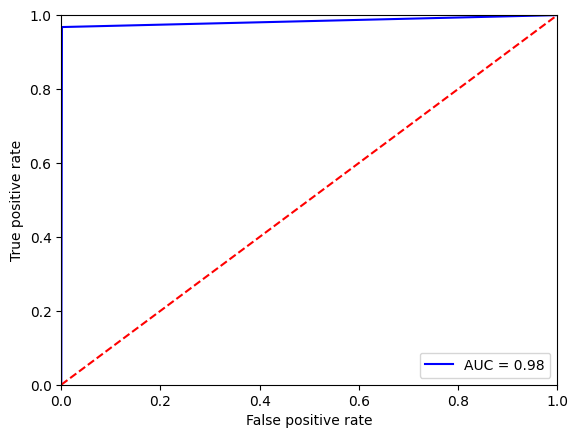

In [ ]:
#ROC-AUC metric
class_probabilities = dt.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for random forest: {roc_auc}")

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show

# AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(X_train, y_train)

predicada = ada.predict(X_test)

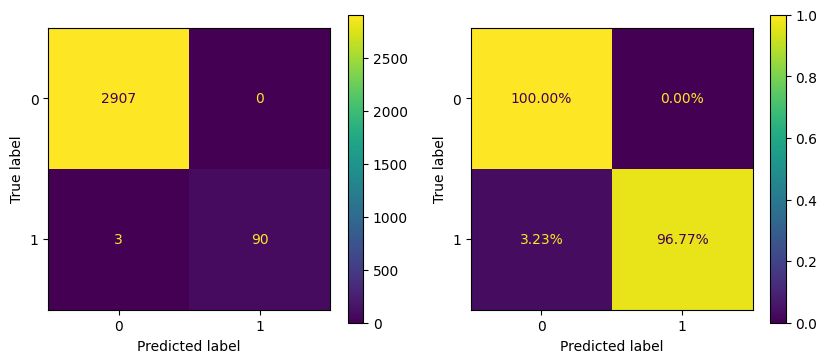

In [ ]:
#Confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test, normalize='true', values_format='.2%', ax=ax[1])

In [ ]:
#Model metrics

ada_accuracy  = accuracy_score(y_test, predicada)
ada_precision = precision_score(y_test, predicada)
ada_recall    = recall_score(y_test, predicada)
ada_score     = f1_score(y_test, predicada)

print(f"Accuracy (correct predictions): {ada_accuracy}")
print(f"Precision (correct positive predictions) {ada_precision}")
print(f"Recall (detected positives: {ada_recall}")
print(f"F1 Score (precision and recall): {ada_score}")

Accuracy (correct predictions): 0.999
Precision (correct positive predictions) 1.0
Recall (detected positives: 0.967741935483871
F1 Score (precision and recall): 0.9836065573770492


AUC for random forest: 0.9797466996608114


<function matplotlib.pyplot.show(close=None, block=None)>

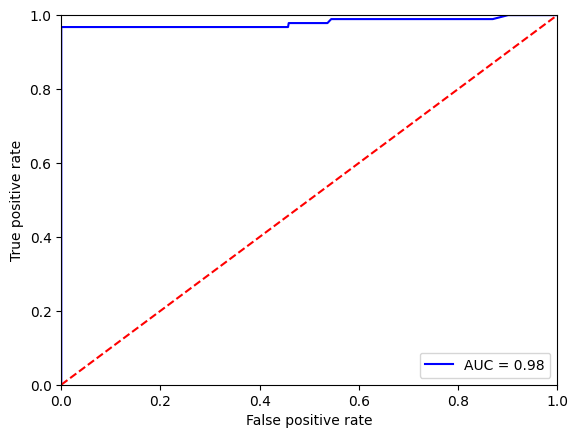

In [ ]:
#ROC-AUC metric
class_probabilities = ada.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for random forest: {roc_auc}")

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show

# GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

predicgbc = gbc.predict(X_test)
predicgbc

array([0, 0, 0, ..., 0, 0, 0])

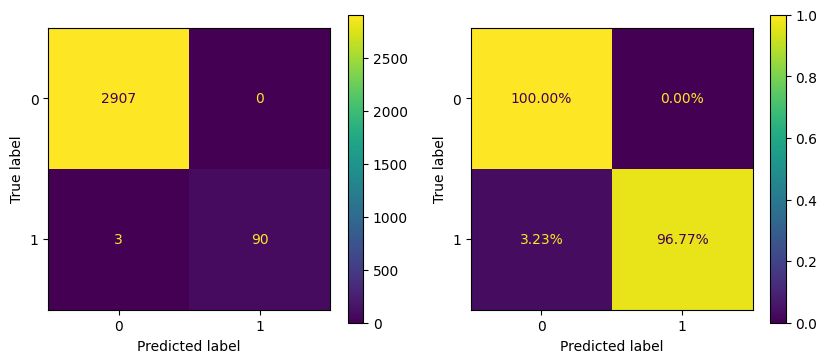

In [ ]:
#Confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test, normalize='true', values_format='.2%', ax=ax[1])

In [ ]:
#Model metrics

gbc_accuracy  = accuracy_score(y_test, predicgbc)
gbc_precision = precision_score(y_test, predicgbc)
gbc_recall    = recall_score(y_test, predicgbc)
gbc_score     = f1_score(y_test, predicgbc)

print(f"Accuracy (correct predictions): {gbc_accuracy}")
print(f"Precision (correct positive predictions): {gbc_precision}")
print(f"Recall (detected positives): {gbc_recall}")
print(f"F1 Score (precision and recall): {gbc_score}")

Accuracy (correct predictions): 0.999
Precision (correct positive predictions): 1.0
Recall (detected positives): 0.967741935483871
F1 Score (precision and recall): 0.9836065573770492


AUC for random forest: 0.9782560449193827


<function matplotlib.pyplot.show(close=None, block=None)>

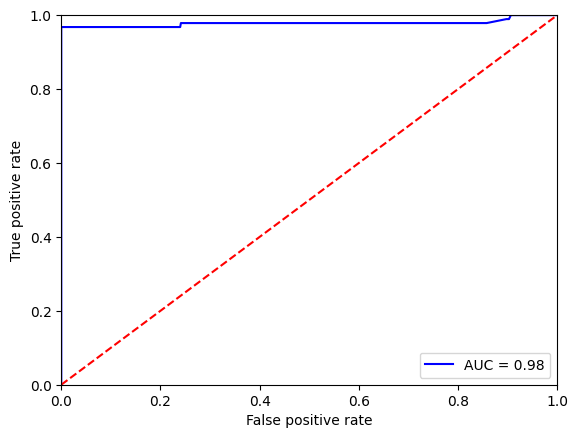

In [ ]:
#ROC-AUC metric
class_probabilities = gbc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for random forest: {roc_auc}")

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show

# Comparison of Models

Text(0.5, 1.0, 'GradientBoostingClassifier Model')

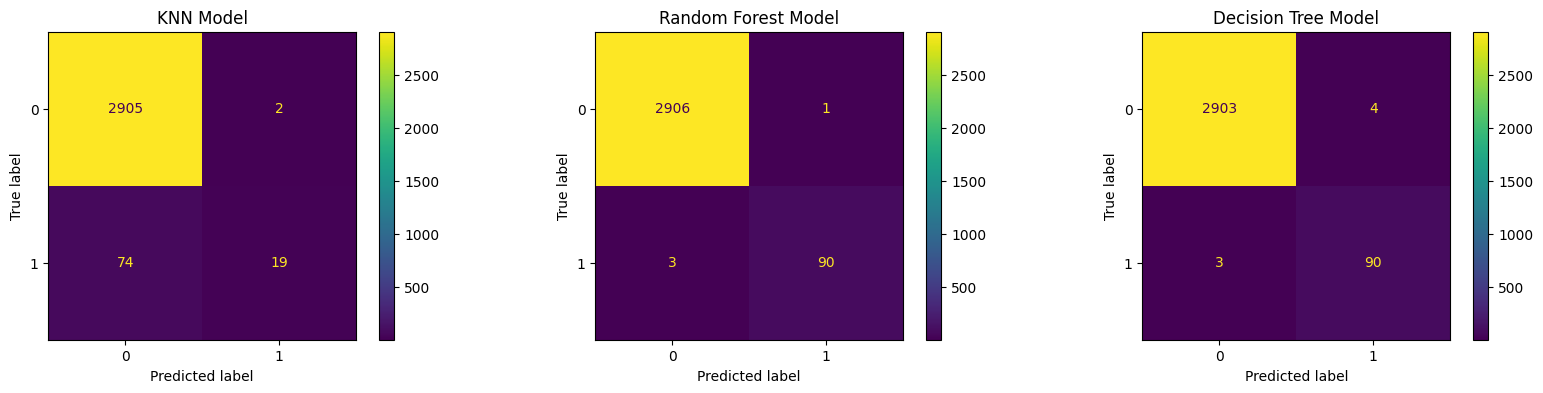

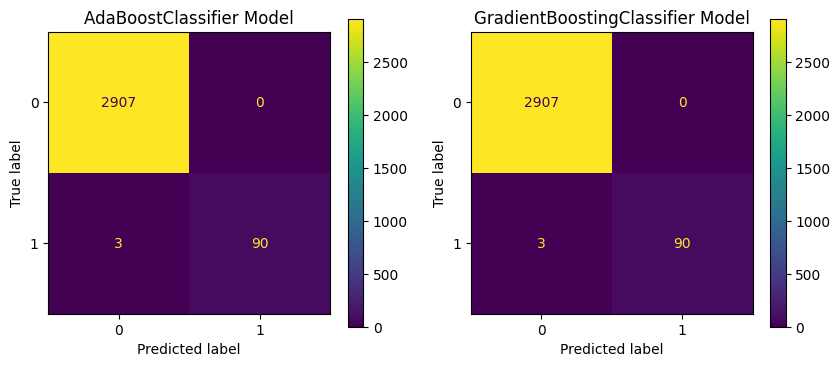

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=ax[0])
ax[0].set_title('KNN Model')

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[1])
ax[1].set_title('Random Forest Model')

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, ax=ax[2])
ax[2].set_title('Decision Tree Model')

fig1, ax1 = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test, ax=ax1[0])
ax1[0].set_title('AdaBoostClassifier Model')

ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test, ax=ax1[1])
ax1[1].set_title('GradientBoostingClassifier Model')


<ipython-input-107-a5116af0db3c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y, palette="crest");


F1 Score (KNN): 0.33333333333333337
F1 Score (Random Forest): 0.9782608695652174
F1 Score (Decision Tree): 0.9625668449197862
F1 Score (Ada Boost Classifier): 0.9836065573770492
F1 Score (Gradient Boosting Classifier): 0.9836065573770492


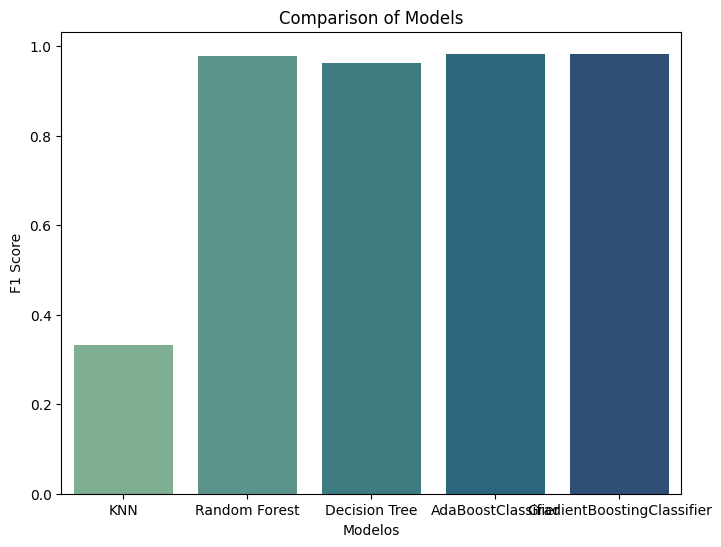

In [ ]:
#Para la comparacion usamos la metrica Accuracy

x = ["KNN",
     "Random Forest",
     "Decision Tree",
     "AdaBoostClassifier",
     "GradientBoostingClassifier"]

y = [knn_score,
     rf_score,
     dt_score,
     ada_score,
     gbc_score]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");

plt.xlabel("Modelos")
plt.ylabel("F1 Score")
plt.title("Comparison of Models");

print(f"F1 Score (KNN): {knn_score}")
print(f"F1 Score (Random Forest): {rf_score}")
print(f"F1 Score (Decision Tree): {dt_score}")
print(f"F1 Score (Ada Boost Classifier): {ada_score}")
print(f"F1 Score (Gradient Boosting Classifier): {gbc_score}")

# Algorithm improvements

In [ ]:
#List of Hyperparameters
n_estimators = list(np.arange(1, 10))
learning_rate = list(np.arange(1, 5))
random_state = list(np.arange(1, 10))
algorithm = ['SAMME', 'SAMME.R']


#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state, algorithm=algorithm)

#Create the new object
ada2 = AdaBoostClassifier()

#Use GridSearch
clf = GridSearchCV(estimator=ada2, param_grid=hyperparameters, scoring = 'neg_mean_absolute_error',
                   cv = 5, verbose = 1, n_jobs = -1)

#Train the model
best_model = clf.fit(X_train, y_train)

#Print the best hyperparameter values
print('Mejor n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Mejor learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Mejor random_state:', best_model.best_estimator_.get_params()['random_state'])
print('Mejor algorithm:', best_model.best_estimator_.get_params()['algorithm'])


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Mejor n_estimators: 3
Mejor learning_rate: 2
Mejor random_state: 1
Mejor algorithm: SAMME


In [ ]:
#List of Hyperparameters
param_dist = {'n_estimators':np.arange(1, 10),
              'learning_rate':np.arange(1, 5),
              'random_state':np.arange(1, 10),
              'algorithm':['SAMME', 'SAMME.R']}


#Create the new object
ada2 = AdaBoostClassifier()

#Use RandomizedSearch
clf = RandomizedSearchCV(ada2, param_dist, n_iter=100, random_state=0, cv=5)


#Train the model
best_model = clf.fit(X_train, y_train)

#Print the best values of the hyperparameters
print('Mejor n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Mejor learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Mejor random_state:', best_model.best_estimator_.get_params()['random_state'])
print('Mejor algorithm:', best_model.best_estimator_.get_params()['algorithm'])


Mejor n_estimators: 9
Mejor learning_rate: 2
Mejor random_state: 3
Mejor algorithm: SAMME.R


# GridSearchCV Parameters

In [ ]:
ada2 = AdaBoostClassifier(n_estimators=3, learning_rate=2, random_state=1, algorithm='SAMME')
ada2.fit(X_train, y_train)

predicada2 = ada2.predict(X_test)

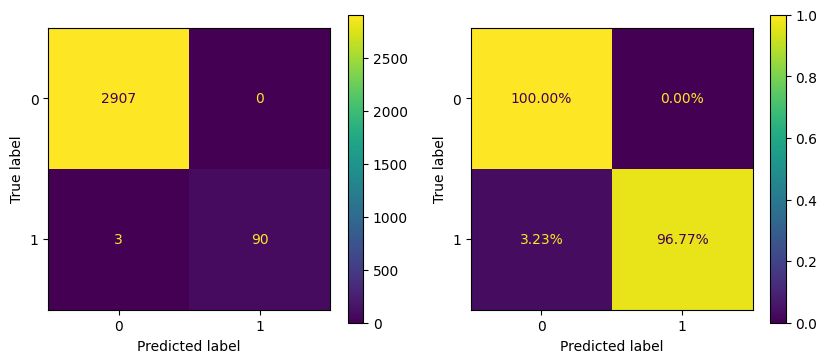

In [ ]:
#Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(ada2, X_test, y_test, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(ada2, X_test, y_test, normalize='true', values_format='.2%', ax=ax[1])

In [ ]:
ada2_score     = f1_score(y_test, predicada2)

print(f"F1 Score (precision and recall): {ada2_score}")

F1 Score (precision and recall): 0.9836065573770492


# RandomizedSearchCV Parameters

In [ ]:
ada3 = AdaBoostClassifier(n_estimators=9, learning_rate=2, random_state=3, algorithm='SAMME.R')
ada3.fit(X_train, y_train)

predicada3 = ada3.predict(X_test)

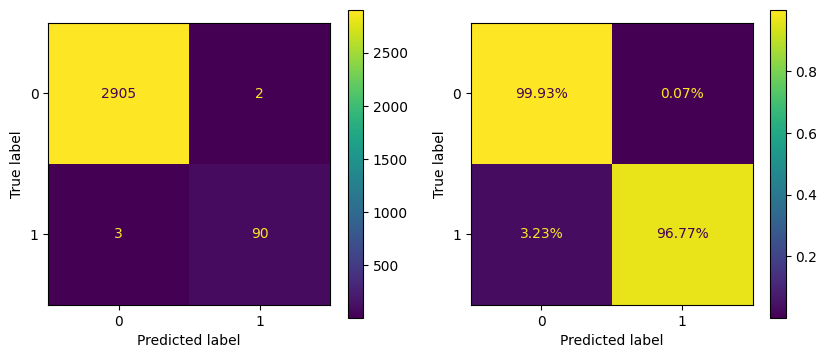

In [ ]:
#Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_estimator(ada3, X_test, y_test, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(ada3, X_test, y_test, normalize='true', values_format='.2%', ax=ax[1])

In [ ]:
ada3_score = f1_score(y_test, predicada3)

print(f"F1 Score (precision and recall): {ada3_score}")

F1 Score (precision and recall): 0.972972972972973


In [ ]:
!pip install gradio

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
import lightgbm as lgb

# Import and read the dataset
data = pd.read_csv('predictive_maintenance.csv')

# Data preprocessing
data = data.replace({'Type': {'L':0, 'M':1, 'H':2}})
data = data.replace({'Failure Type': {'No Failure':0, 'Heat Dissipation Failure':1, 'Power Failure':2, 'Overstrain Failure':3, 'Tool Wear Failure':4, 'Random Failures':5}})
data.drop(columns=['Facility ID'], inplace=True)
data = data.rename(columns={'College building':'College building', 'College bus':'College bus', 'Medical equipment': 'Medical equipment', 'Network infrastructure': 'Network infrastructure', 'Official car ': 'Official car    '})

# Define target and features
y = data['Target']
X = data.drop('Target', axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

# Train models
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada.fit(X_train, y_train)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Prediction functions
def predict_knn(*args):
    input_data = np.array(args).reshape(1, -1)
    prediction = knn.predict(input_data)[0]
    if prediction == 0:
        prediction = "No Failure Imminent"
    elif prediction == 1:
        prediction = "Failure Imminent"
    return prediction

def predict_rf(*args):
    input_data = np.array(args).reshape(1, -1)
    prediction = rf.predict(input_data)[0]
    if prediction == 0:
        prediction = "No Failure Imminent"
    elif prediction == 1:
        prediction = "Failure Imminent"
    return prediction

def predict_dt(*args):
    input_data = np.array(args).reshape(1, -1)
    prediction = dt.predict(input_data)[0]
    if prediction == 0:
        prediction = "No Failure Imminent"
    elif prediction == 1:
        prediction = "Failure Imminent"
    return prediction

def predict_ada(*args):
    input_data = np.array(args).reshape(1, -1)
    prediction = ada.predict(input_data)[0]
    if prediction == 0:
        prediction = "No Failure Imminent"
    elif prediction == 1:
        prediction = "Failure Imminent"
    return prediction

def predict_gbc(*args):
    input_data = np.array(args).reshape(1, -1)
    prediction = gbc.predict(input_data)[0]
    if prediction == 0:
        prediction = "No Failure"
    elif prediction == 1:
        prediction = "Failure Imminent"
    return prediction

In [ ]:

# Gradio interface
 #gr.Slider(2, 20, value=4, label="Count", info="Choose between 2 and 20"),
inputs = [gr.Slider(0, 10000, value=1, label=col, info="Choose between 2 and 10000") for col in X.columns]
inputs2 = [gr.Slider(0, 10000, value=1, label=col, info="Choose between 2 and 10000") for col in X.columns]
inputs3 = [gr.Slider(0, 10000, value=1, label=col, info="Choose between 2 and 10000") for col in X.columns]
inputs4 = [gr.Slider(0, 10000, value=1, label=col, info="Choose between 2 and 10000") for col in X.columns]
inputs5 = [gr.Slider(0, 10000, value=1, label=col, info="Choose between 2 and 10000") for col in X.columns]
#inputs = [gr.Slider(0, 10, value=1 step=1, default=5, label=col) for col in X.columns]
output = gr.Textbox()
output2 = gr.Textbox()
output3 = gr.Textbox()
output4 = gr.Textbox()
output5 = gr.Textbox()

knn_interface = gr.Interface(fn=predict_knn, inputs=inputs, outputs=output, title="KNN Prediction")
rf_interface = gr.Interface(fn=predict_rf, inputs=inputs2, outputs=output2, title="Random Forest Prediction")
dt_interface = gr.Interface(fn=predict_dt, inputs=inputs3, outputs=output3, title="Decision Tree Prediction")
ada_interface = gr.Interface(fn=predict_ada, inputs=inputs4, outputs=output4, title="AdaBoost Prediction")
gbc_interface = gr.Interface(fn=predict_gbc, inputs=inputs5, outputs=output5, title="Gradient Boosting Prediction")

gr.TabbedInterface([knn_interface, rf_interface, dt_interface, ada_interface, gbc_interface], ["KNN", "Random Forest", "Decision Tree", "AdaBoost", "Gradient Boosting"]).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://614c5663f9d746a71a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
